<a href="https://colab.research.google.com/github/ushasri0412/zomato_data_analysis_task/blob/main/Zomato_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **ZOMATO BANGALORE DATA ANALYSIS**




**Objective:**

To perform Exploratory Data Analysis (EDA) on the Zomato Bangalore dataset and generate
meaningful business insights using Python.

In [403]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [404]:
#reading the excel file
df=pd.read_excel("/content/zomato_rest_data.xlsx")


# **Task 1: Data Understanding & Cleaning**

1. Dataset Exploration

In [405]:
# Display first 5 rows
df.head(5)

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [406]:
#renaming columns
d={"listed_in(type)":"Resturant_type","listed_in(city)":"Location"}
df.rename(columns=d,inplace=True)

In [407]:
# Display shape of dataset (rows and columns)
df.shape

(51717, 18)

In [408]:
# List column names
df.columns

Index(['Unnamed: 0', 'url', 'address', 'name', 'online_order', 'book_table',
       'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked',
       'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'Resturant_type', 'Location'],
      dtype='object')

In [409]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   51717 non-null  int64 
 1   url                          51717 non-null  object
 2   address                      51717 non-null  object
 3   name                         51717 non-null  object
 4   online_order                 51717 non-null  object
 5   book_table                   51717 non-null  object
 6   rate                         43942 non-null  object
 7   votes                        51717 non-null  int64 
 8   phone                        50509 non-null  object
 9   location                     51696 non-null  object
 10  rest_type                    51490 non-null  object
 11  dish_liked                   23639 non-null  object
 12  cuisines                     51672 non-null  object
 13  approx_cost(for two people)  51

In [410]:
#removing unwanted columns
df=df.drop(["Unnamed: 0","address","phone","url","location","reviews_list","menu_item","rest_type"],axis=1)


In [411]:
# Identify missing values
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
dish_liked,28078
cuisines,45
approx_cost(for two people),346
Resturant_type,0
Location,0


2. Data Cleaning

In [412]:
# removing duplicates
df.drop_duplicates(inplace=True)
df.shape

(51577, 10)


Cleaning Data and Handling null values

In [413]:
#cleaning rate column
df["rate"].unique()
#converting to numeric
df["rate"]=df["rate"].str.replace("/5","")
# new is a string converting to null
df["rate"]=df["rate"].replace("NEW",np.nan)
# converting to null
df["rate"]=df["rate"].replace("-",np.nan)
# converting to float
df["rate"]=df["rate"].astype(float)
#handling with null values
df["rate"]=df["rate"].fillna(round(df["rate"].mean()))
df["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [414]:
#cleaning dish liked column
#checking for unique values
df["dish_liked"].unique()
# filling values with mode value
df["dish_liked"]=df["dish_liked"].fillna(df["dish_liked"].mode()[0])
df["dish_liked"].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [415]:
#cleaning cuisines column

#checking for unique values
df["cuisines"].unique()
# filling values with mode value
df["cuisines"]=df["cuisines"].fillna(df["cuisines"].mode()[0])
df["dish_liked"].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [416]:
#cleaning approx_cost(for two people)	column

#checking for unique values
df["approx_cost(for two people)"].unique()
#removing "," as we need data in numeric
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].str.replace(",","")
#converting data to float
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].astype(float)
#calculating mean and filling null values (Handling missing values)
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].fillna(round(df["approx_cost(for two people)"].mean()))
df["approx_cost(for two people)"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,  555., 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [417]:
#checking whether null values are cleared or not
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
dish_liked,0
cuisines,0
approx_cost(for two people),0
Resturant_type,0
Location,0


# **Task 2: Univariate Analysis**

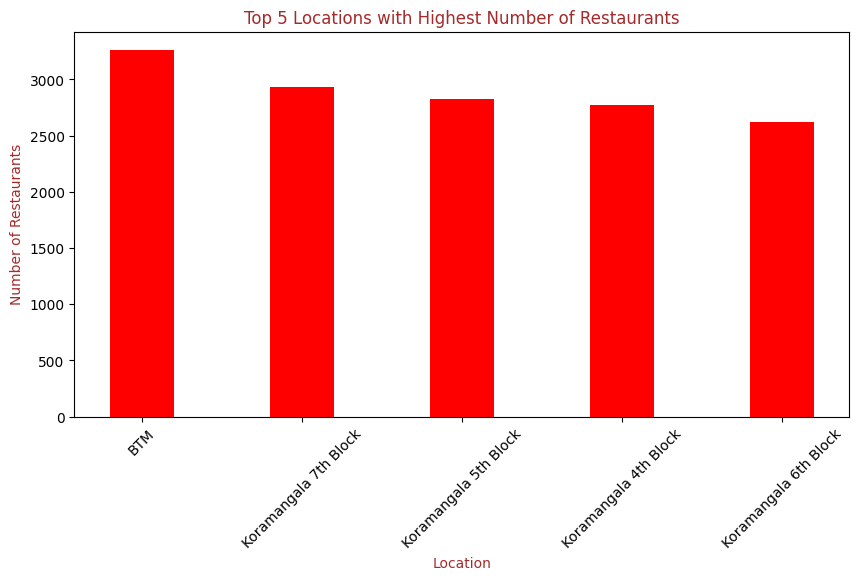

In [418]:
# 1. Top 5 locations with highest number of restaurants

# group by location and resturant name
location = df.groupby("Location")["name"].count()
#creating a data frame
location = pd.DataFrame(location)
location.reset_index(inplace=True)
#to fetch top 5 values we are sorting
location = location.sort_values(by="name", ascending=False).head(5)
#plot clearly with big size
plt.figure(figsize=(10,5))
#naming labels and giving title
plt.xlabel("Location", color="Brown")
plt.ylabel("Number of Restaurants", color="Brown")
plt.title("Top 5 Locations with Highest Number of Restaurants", color="Brown")
#ploting bar graph
plt.bar(location["Location"], location["name"],color="Red", width=0.4)
# rotate labels on x axis  for clear visibility
plt.xticks(rotation=45)
#remove unwanted output shown
plt.show()

**Interpretation**


Number of resturants are more in BTM  (more than 3000 )

Koramangala 7th block ,

Koramangala 5th block,

Koramangala 4th block ,

Koramangala 6th block are being in the top 5 locations having
more resturants (range : 2500-3000)

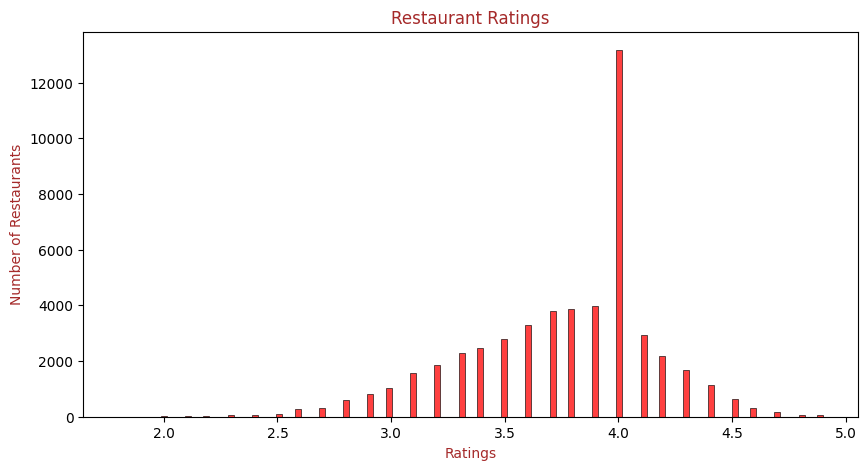

In [419]:
#2. Distribution of restaurant ratings

#plot clearly with big size
plt.figure(figsize=(10,5))
#naming labels and giving title
plt.xlabel("Ratings", color="Brown")
plt.ylabel("Number of Restaurants", color="Brown")
#ploting histplot
sns.histplot(df["rate"],color="red")
plt.title("Restaurant Ratings",color="Brown")
#remove unwanted output shown
plt.show()

**Interpretation**

The most repeated rating is 4.0


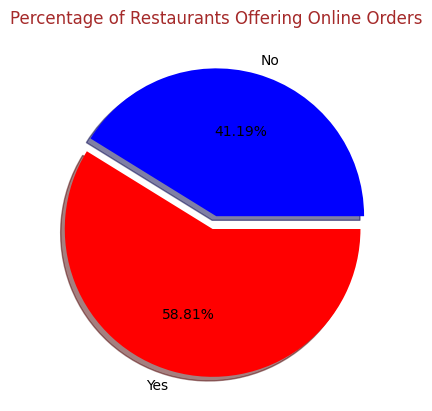

In [420]:
# 3. Percentage of restaurants offering online orders
online = df.groupby("online_order")["name"].count()
online = pd.DataFrame(online)
online.reset_index(inplace=True)
plt.pie(online["name"],labels=online["online_order"],autopct="%0.2f%%",colors=["blue","red"],shadow=True, explode=(0,0.09))
plt.title("Percentage of Restaurants Offering Online Orders",color="Brown")
plt.show()

**Interpretation**

58.81 % customers prefer online orders.


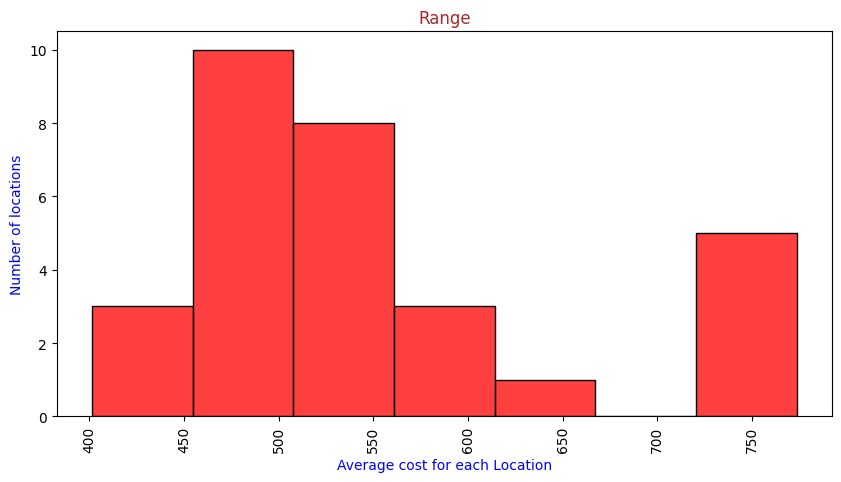

In [421]:
# 4.Distribution of average cost for two
avg_cost = df.groupby("Location")["approx_cost(for two people)"].mean()
avg_cost = pd.DataFrame(avg_cost)
avg_cost.reset_index(inplace=True)
plt.figure(figsize=(10,5))
sns.histplot(avg_cost["approx_cost(for two people)"],color="red")
plt.xlabel("Average cost for each Location", color="blue")
plt.ylabel("Number of locations", color="blue")
plt.title("Range", color="Brown")
plt.xticks(rotation=90)
plt.show()


**Interpretation**

10 locations have average cost range between 450 -500

# Task 3: Bivariate Analysis

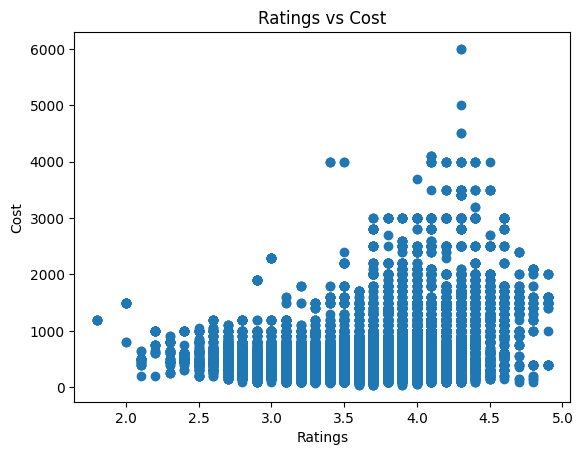

In [422]:
#1.Rating vs Cost

#Scatter plot should be used as 2 numeric columns are there
plt.scatter(df["rate"],df["approx_cost(for two people)"])
#labels and title names are given
plt.xlabel("Ratings")
plt.ylabel("Cost")
plt.title("Ratings vs Cost")
plt.show()


**Interpretation**

more number of ratings are given by customers who purchased low cost goods

customers who bought costly items gave good ratings

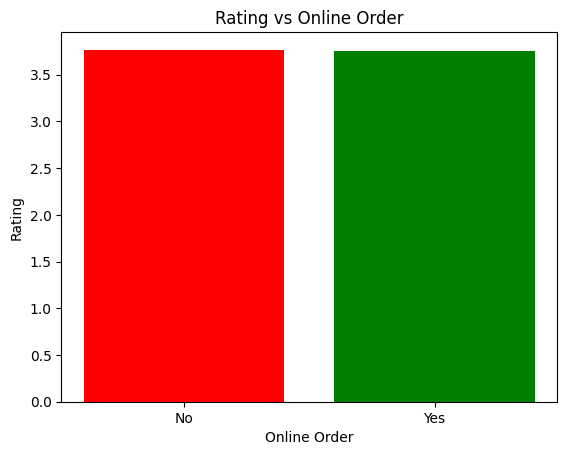

In [423]:
#2. Rating vs Online Order

#grouping on
online=df.groupby("online_order")["rate"].mean()
online=pd.DataFrame(online)
online.reset_index(inplace=True)
#plot bargraph
plt.bar(online["online_order"],online["rate"],color=["red","green"])
#mention label and title names
plt.xlabel("Online Order")
plt.ylabel("Rating")
plt.title("Rating vs Online Order")
plt.show()

**Interpretation**

Customers are equally interested and happy with both online and offline orders

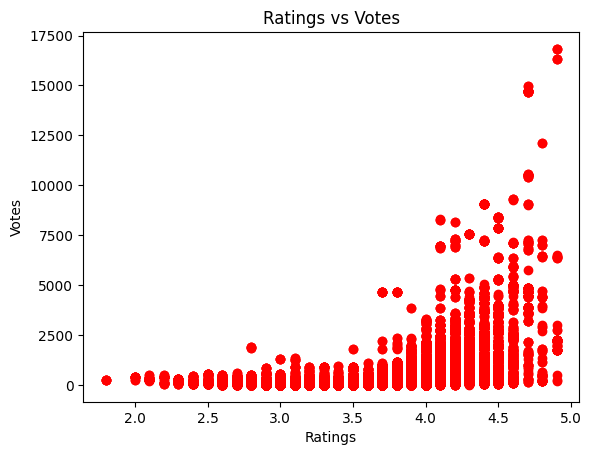

In [424]:
#3. Votes vs Rating
#Scatter plot should be used as 2 numeric columns are there
plt.scatter(df["rate"],df["votes"],color="red")
#labels and title names are given
plt.xlabel("Ratings")
plt.ylabel("Votes")
plt.title("Ratings vs Votes")
plt.show()

**Interpretation**

More number of votes are given to higher ratings.

# **Task 4: Business Insights & Recommendations**


**1. Does higher cost lead to higher ratings?**

-->Higher cost leads to higher ratings.

**2. Does offering online order impact ratings?**

-->Customers are liking online and offer orders equally.

**3. Which location appears highly competitive?**

-->BTM is the highly compititive.

**4. Where would you recommend opening a new restaurant?**

-->Malleshwaram , Rajajinagar,Banashankari, new BEL road are the locations to set up a new restaurant, as there is less competition.


In [425]:
df.to_csv("cleaned_data.csv") # to save the cleaned file in .csv format